<a href="https://colab.research.google.com/github/educbd/EDAs/blob/main/Groundhog_Day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis in Python

In this Python notebook, I aim to perform fundamental Exploratory Data Analysis (EDA) on a dataset. My objective is to comprehend the data, identify any anomalies, and address them using the basic data cleaning techniques acquired during my enrollment in the **Data Analytics for Business Program** at **St. Clair College**.

In [142]:
# To commence our notebook, let's set it up with the necessary
# libraries essential for Exploratory Data Analysis (EDA).

import pandas as pd # to read the datasets
import numpy as np # to execute calculations
import matplotlib.pyplot as plt # to create some visualizations
import missingno as msno # used to plot missing values
import seaborn as sns

In this analysis, I will utilize the **"Groundhog Day Forecasts and Temperatures"** dataset. The primary purpose of using this dataset is to investigate and determine the accuracy of Punxsutawney Phil's winter weather forecast.

_According to legend, if Phil sees his shadow the United States is in store for six more weeks of winter weather. But, if Phil doesn’t see his shadow, the country should expect warmer temperatures and the arrival of an early spring._

In [143]:
# We will proceed by reading the CSV file that requires analysis and assign it
# to a variable named raw_df. As the CSV file has been uploaded to a GitHub
# repository, we can effortlessly access it using the provided link below:
# https://www.kaggle.com/datasets/groundhogclub/groundhog-day

raw_df = pd.read_csv('https://github.com/educbd/EDAs/blob/main/Groundhog%20Day.csv?raw=True')

In [144]:
# After storing the dataset into a variable, it is always recommended to create
# a copy of it before beginning any work. This ensures that we work on the
# copied version, leaving the original dataset intact and unchanged:

ghd = raw_df.copy()

In [145]:
# Here is how the dataset looks like:

ghd.head(5)

,Year,Punxsutawney Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1886,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1887,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1888,Full Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1889,No Record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1890,No Shadow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
# To show the number of rows and columns we can use the .shape method in the dataset:

ghd.shape

(132, 10)

In [147]:
# Now let's show the column's names:

ghd.columns

Index(['Year', 'Punxsutawney Phil', 'February Average Temperature',
       'February Average Temperature (Northeast)',
       'February Average Temperature (Midwest)',
       'February Average Temperature (Pennsylvania)',
       'March Average Temperature', 'March Average Temperature (Northeast)',
       'March Average Temperature (Midwest)',
       'March Average Temperature (Pennsylvania)'],
      dtype='object')

### Hands-on!

In [148]:
# First things first. Let's rename the columns due to their
# excessively long names. We can achieve this using the .str.replace() function,
# specifying the text to be replaced as the first argument and the
# new text as the second argument:

ghd.columns = ghd.columns.str.replace('February', 'feb')
ghd.columns = ghd.columns.str.replace('March', 'mar')
ghd.columns = ghd.columns.str.replace('Average', 'avg')
ghd.columns = ghd.columns.str.replace('Temperature', 'temp')
ghd.columns = ghd.columns.str.replace(' ', '_')
ghd.columns = ghd.columns.str.replace('(', '')
ghd.columns = ghd.columns.str.replace(')', '')
ghd.columns

<ipython-input-148-4b794f0072bb>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ghd.columns = ghd.columns.str.replace('(', '')
<ipython-input-148-4b794f0072bb>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ghd.columns = ghd.columns.str.replace(')', '')


Index(['Year', 'Punxsutawney_Phil', 'feb_avg_temp', 'feb_avg_temp_Northeast',
       'feb_avg_temp_Midwest', 'feb_avg_temp_Pennsylvania', 'mar_avg_temp',
       'mar_avg_temp_Northeast', 'mar_avg_temp_Midwest',
       'mar_avg_temp_Pennsylvania'],
      dtype='object')

In [149]:
# To see the number of unique values in each column, we can utilize
# the .nunique() function on the dataset:

ghd.nunique()

Year                         132
Punxsutawney_Phil              4
feb_avg_temp                 116
feb_avg_temp_Northeast        84
feb_avg_temp_Midwest          90
feb_avg_temp_Pennsylvania     86
mar_avg_temp                 112
mar_avg_temp_Northeast        82
mar_avg_temp_Midwest          85
mar_avg_temp_Pennsylvania     85
dtype: int64

In [150]:
# This is useful to determine if a column contains different values for each row
# like 'Year', or if the values are repeated like in the 'Punxsutawney_Phil' column
# that only shows 4 different values for all the 132 rows in the dataset.

In [151]:
# Let's go a little deeper in our understanding of the data.
# This next code shows the class of our data, how's the data indexed, column names
# null values and data types. All that as simplier as this function:

ghd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       132 non-null    object 
 1   Punxsutawney_Phil          131 non-null    object 
 2   feb_avg_temp               123 non-null    float64
 3   feb_avg_temp_Northeast     123 non-null    float64
 4   feb_avg_temp_Midwest       123 non-null    float64
 5   feb_avg_temp_Pennsylvania  123 non-null    float64
 6   mar_avg_temp               123 non-null    float64
 7   mar_avg_temp_Northeast     123 non-null    float64
 8   mar_avg_temp_Midwest       123 non-null    float64
 9   mar_avg_temp_Pennsylvania  123 non-null    float64
dtypes: float64(8), object(2)
memory usage: 10.4+ KB


In [152]:
# At this stage, we encounter several issues with the dataset:
# 1) As observed earlier, the "Punxsutawney_Phil" column consists of only four
#    distinct values, indicating it can be treated as a categorical column (also feature).
# 2) We notice a significant number of null values in most of our features since the total
#    amount of rows are 132 and the non-null count is 123 for most of our features.


In [153]:
# to solve the first issue, we can change the data type of each feature
# using the .astype() function:

ghd.Punxsutawney_Phil = ghd['Punxsutawney_Phil'].astype('category')
ghd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Year                       132 non-null    object  
 1   Punxsutawney_Phil          131 non-null    category
 2   feb_avg_temp               123 non-null    float64 
 3   feb_avg_temp_Northeast     123 non-null    float64 
 4   feb_avg_temp_Midwest       123 non-null    float64 
 5   feb_avg_temp_Pennsylvania  123 non-null    float64 
 6   mar_avg_temp               123 non-null    float64 
 7   mar_avg_temp_Northeast     123 non-null    float64 
 8   mar_avg_temp_Midwest       123 non-null    float64 
 9   mar_avg_temp_Pennsylvania  123 non-null    float64 
dtypes: category(1), float64(8), object(1)
memory usage: 9.7+ KB


In [154]:
# So we can count the number of missing values easly:

ghd.isna().sum()

Year                         0
Punxsutawney_Phil            1
feb_avg_temp                 9
feb_avg_temp_Northeast       9
feb_avg_temp_Midwest         9
feb_avg_temp_Pennsylvania    9
mar_avg_temp                 9
mar_avg_temp_Northeast       9
mar_avg_temp_Midwest         9
mar_avg_temp_Pennsylvania    9
dtype: int64

<Axes: >

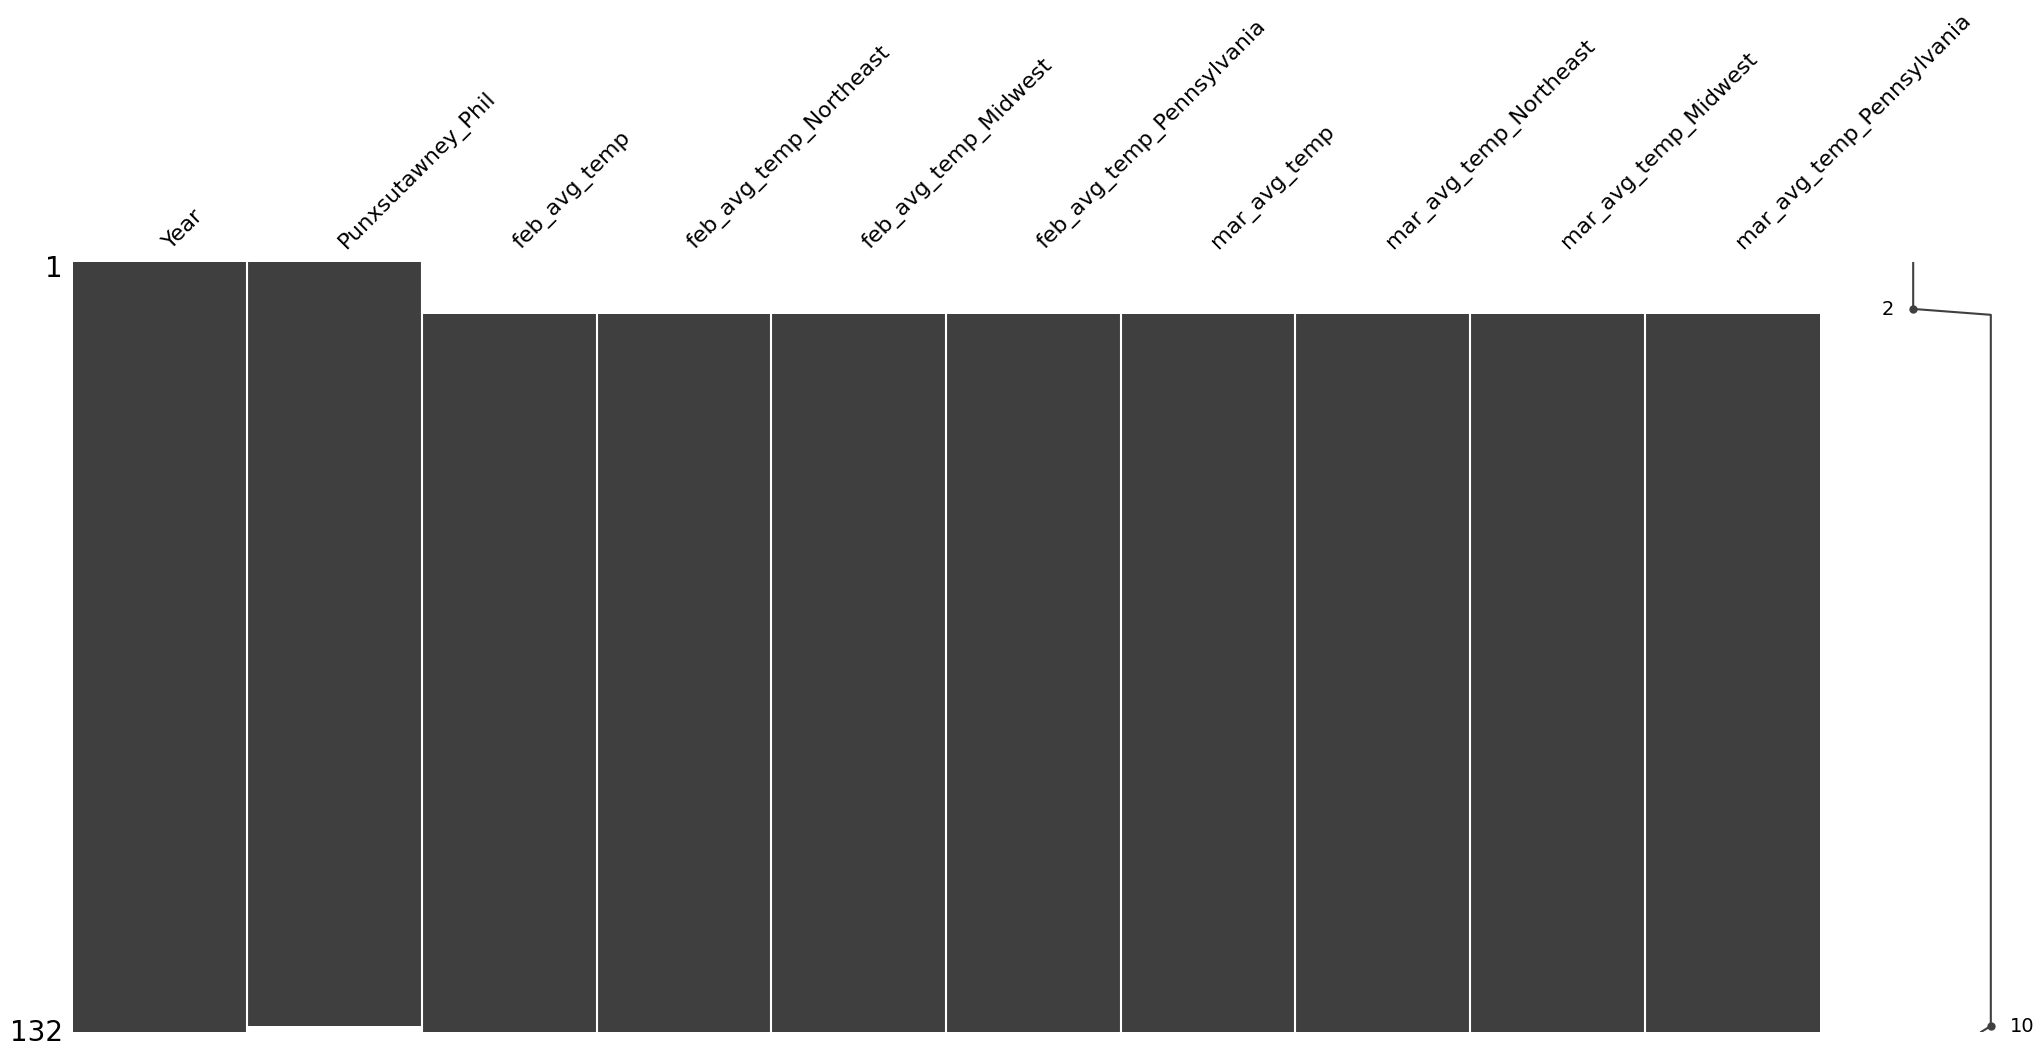

In [155]:
# Is better to use a plot to have a deeper idea where are our missing values
# 'phisically' located in the dataset. We can use the missingno library:

msno.matrix(ghd)

In [156]:
# In this graph we can observe a null value at the bottom of the Punxsutawney_Phil feature
# and at the beginning of the last 8 features.

In [157]:
# There are much to do with missing values but for prupose of this notebook I will just
# drop them since are not much representative for our analysis.

# Dropping missing values:
ghd = ghd.dropna()

<Axes: >

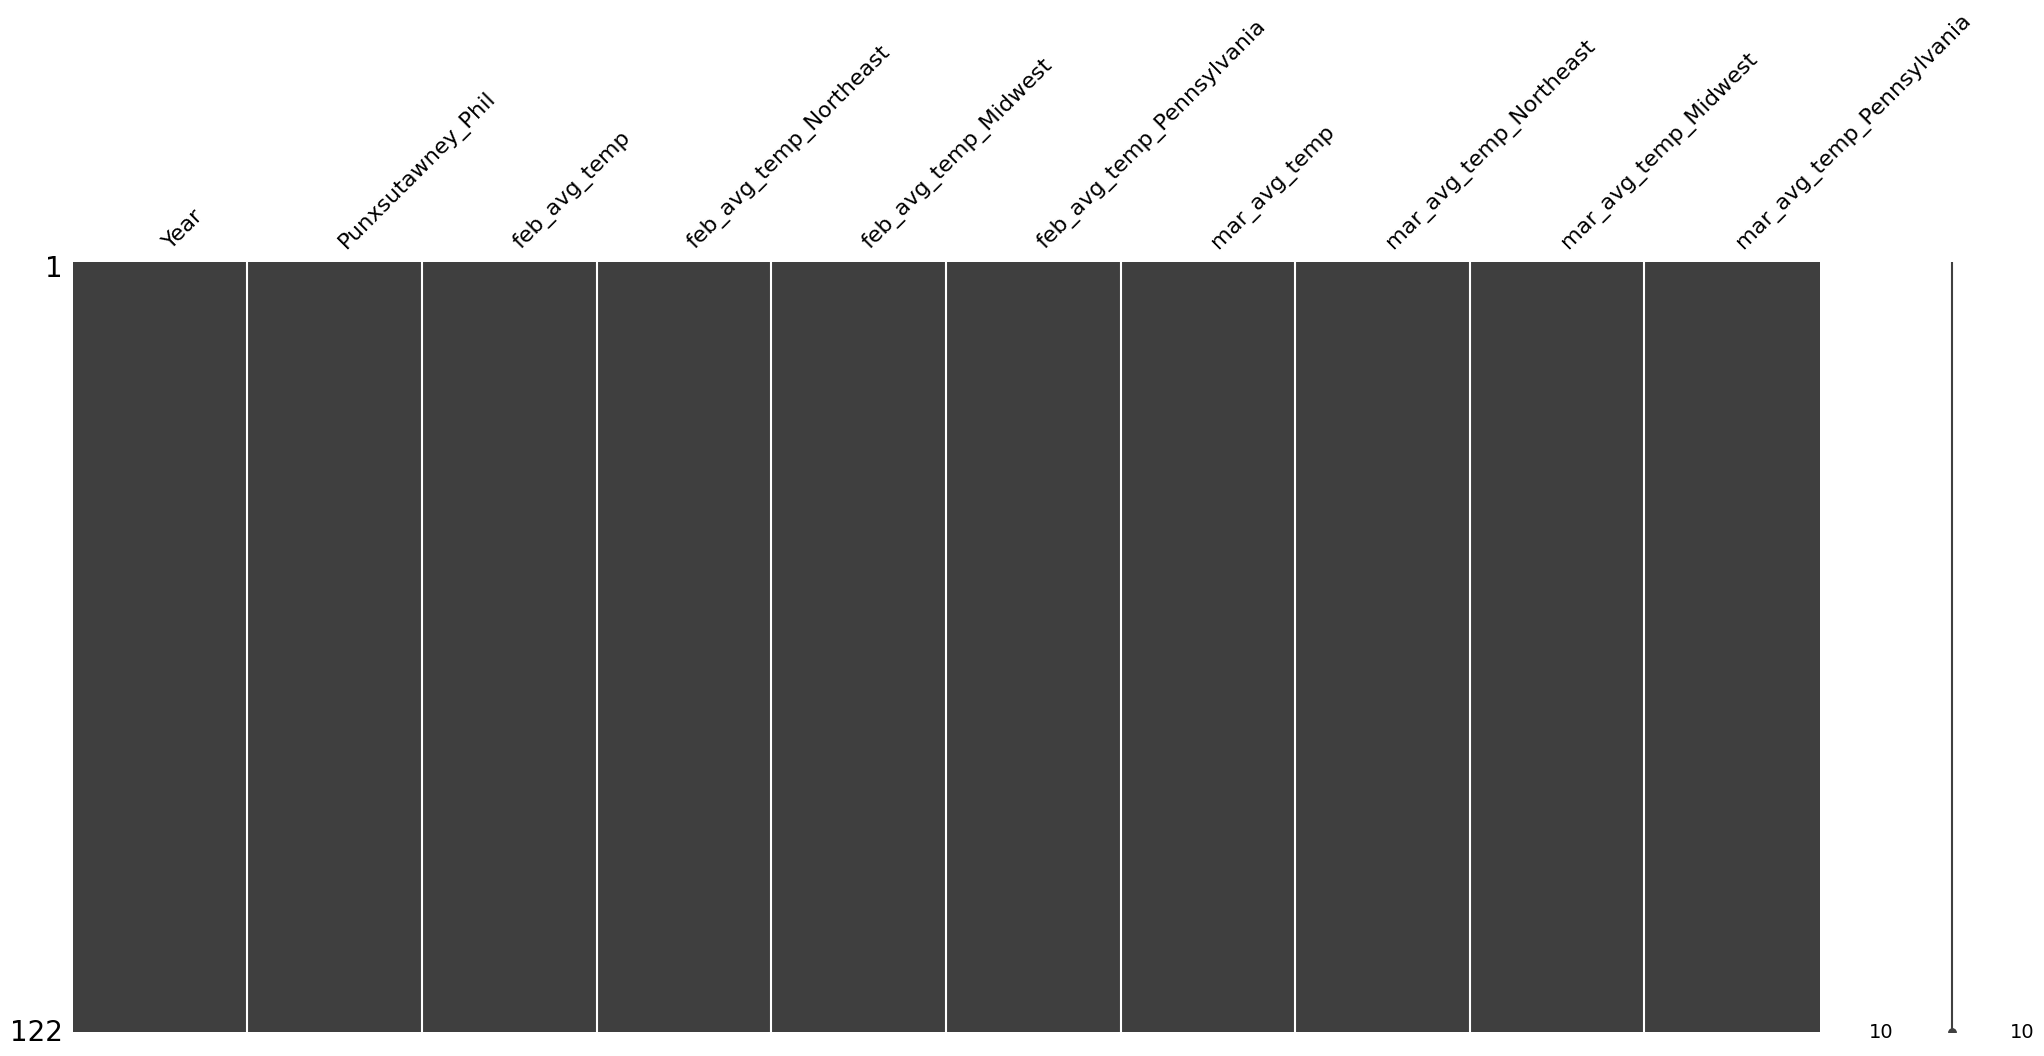

In [158]:
# Recreate the plot to compare the results:
msno.matrix(ghd)

In [159]:
# There is no more missing values in any feature and we can double check with our
# .isna().sum()  function:

ghd.isna().sum()

Year                         0
Punxsutawney_Phil            0
feb_avg_temp                 0
feb_avg_temp_Northeast       0
feb_avg_temp_Midwest         0
feb_avg_temp_Pennsylvania    0
mar_avg_temp                 0
mar_avg_temp_Northeast       0
mar_avg_temp_Midwest         0
mar_avg_temp_Pennsylvania    0
dtype: int64

In [160]:
# Now some math for the data. We can use the .describe() function to have a quick
# analysis about the minimum and maximum value, mean and standard deviation and some
# percentiles.

ghd.describe( )

,feb_avg_temp,feb_avg_temp_Northeast,feb_avg_temp_Midwest,feb_avg_temp_Pennsylvania,mar_avg_temp,mar_avg_temp_Northeast,mar_avg_temp_Midwest,mar_avg_temp_Pennsylvania
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,33.802705,22.693443,32.694262,26.522951,41.699016,32.368033,42.568852,35.908197
std,3.282861,4.283174,4.863820,4.530900,2.948321,3.889555,4.511401,4.208955
min,25.230000,10.400000,20.300000,15.200000,35.440000,24.200000,28.500000,24.500000
25%,31.777500,20.025000,29.625000,23.600000,39.375000,29.700000,39.075000,32.950000
50%,33.690000,22.950000,33.200000,26.950000,41.810000,32.550000,42.850000,35.850000
75%,36.007500,25.975000,36.300000,29.800000,43.560000,34.800000,45.600000,38.550000
max,41.410000,31.600000,41.400000,35.800000,50.410000,43.400000,56.300000,47.700000


In [161]:
# The .describe() function takes only numeric values if the parameters include/exclude are
# not specified. The 'Year' feature is not shown since the data type for that feature is object
# as seen before and we just care about the first and last year where the dataset is gathered.
# We can use the numpy function min and max:

print(np.min(ghd['Year']))
print(np.max(ghd['Year']))

1895
2016


Therefore, let's revisit and examine the table below. Here are the key insights:
- We are considering ('counting') only 122 records (rows) for every single feature since we had been deleted null values.

- The dataset spans from 1895 to 2016, and the 'feb_avg_temp' and 'mar_avg_temp' features display the average temperatures for each respective month in every year.

- We can conclude that the minimum average temperature for February, recorded between 1895 and 2016, is 25.23, while the maximum average temperature is 41.41 and for March is 35.44 and 50.41 respectively.


In [162]:
# We can also display minimum values for all features:

ghd.min()

<ipython-input-162-e9d509e56f41>:3: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ghd.min()


Year                          1895
feb_avg_temp                 25.23
feb_avg_temp_Northeast        10.4
feb_avg_temp_Midwest          20.3
feb_avg_temp_Pennsylvania     15.2
mar_avg_temp                 35.44
mar_avg_temp_Northeast        24.2
mar_avg_temp_Midwest          28.5
mar_avg_temp_Pennsylvania     24.5
dtype: object

In [163]:
# And maximum values for all features:

ghd.max()

<ipython-input-163-847dd0d108e8>:3: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ghd.max()


Year                          2016
feb_avg_temp                 41.41
feb_avg_temp_Northeast        31.6
feb_avg_temp_Midwest          41.4
feb_avg_temp_Pennsylvania     35.8
mar_avg_temp                 50.41
mar_avg_temp_Northeast        43.4
mar_avg_temp_Midwest          56.3
mar_avg_temp_Pennsylvania     47.7
dtype: object

One we have a better understanding of our data, let's go back a little bit to refresh the legend of Phil and the propuse of this dataset:

_According to legend, if Phil sees his shadow the United States is in store for six more weeks of winter weather. But, if Phil doesn’t see his shadow, the country should expect warmer temperatures and the arrival of an early spring._

In [164]:
# We need then know the unique values for the feature 'Punxsutawney_Phil' which shows
# if Phil sees his shadow or not:

ghd['Punxsutawney_Phil'].value_counts()

Full Shadow       100
No Shadow          15
No Record           6
Partial Shadow      1
Name: Punxsutawney_Phil, dtype: int64

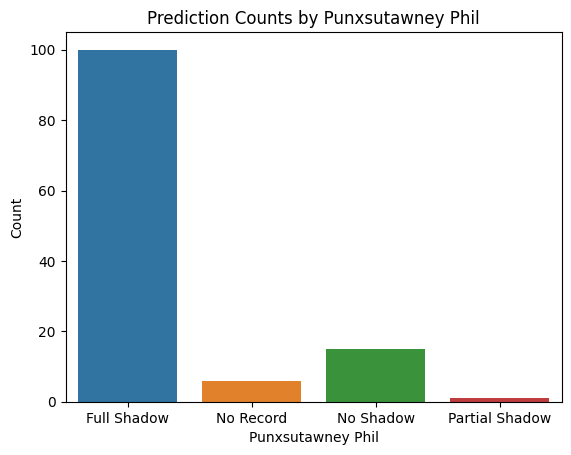

In [165]:
# We can plot this in a barplot using seaborn library but first let's create a
# little dataset using the previous output and naming the features propertly:

phil = ghd['Punxsutawney_Phil'].value_counts().reset_index().rename(columns={'index': 'Phil', 'Punxsutawney_Phil': 'Count'})

# Using sns.barplot() to create a barplot:
sns.barplot(data=phil, x='Phil', y='Count')
plt.xlabel('Punxsutawney Phil')
plt.ylabel('Count')
plt.title('Prediction Counts by Punxsutawney Phil')
plt.show()


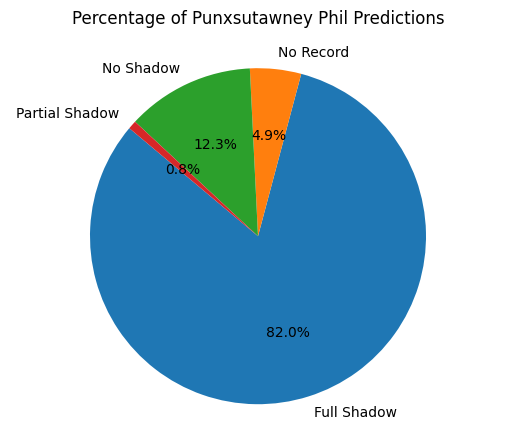

In [166]:
# Would it be convenient to obtain the percentages?

total = len(ghd)
values_to_check = ['Full Shadow', 'No Record', 'No Shadow', 'Partial Shadow']
percentages = []

for value in values_to_check:
    count_value = ghd[ghd['Punxsutawney_Phil'] == value]['Punxsutawney_Phil'].count()
    percentage_value = (count_value / total) * 100
    percentages.append(percentage_value)

# Create the pie chart
plt.pie(percentages, labels=values_to_check, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Punxsutawney Phil Predictions', pad=20)
plt.show()

### Now let's see if predictions are accurated acording to the legend.

**Remember:** _if Phil sees his shadow the United States is in store for six more weeks of winter weather. But, if Phil doesn’t see his shadow, the country should expect warmer temperatures and the arrival of an early spring._

In [167]:
#Let's analyze the occurrences in which Phil sees his shadow.

full_s = ghd[ghd['Punxsutawney_Phil'] == 'Full Shadow']
full_s_num = full_s.select_dtypes(include='number')
full_math = full_s_num.agg(['min', 'mean', 'max'])
full_math

,feb_avg_temp,feb_avg_temp_Northeast,feb_avg_temp_Midwest,feb_avg_temp_Pennsylvania,mar_avg_temp,mar_avg_temp_Northeast,mar_avg_temp_Midwest,mar_avg_temp_Pennsylvania
min,25.2300,12.100,20.300,16.100,35.4400,24.200,28.50,24.500
mean,33.7125,22.727,32.799,26.631,41.6698,32.369,42.62,35.947
max,41.4100,31.600,41.400,35.800,50.4100,43.400,56.30,47.700


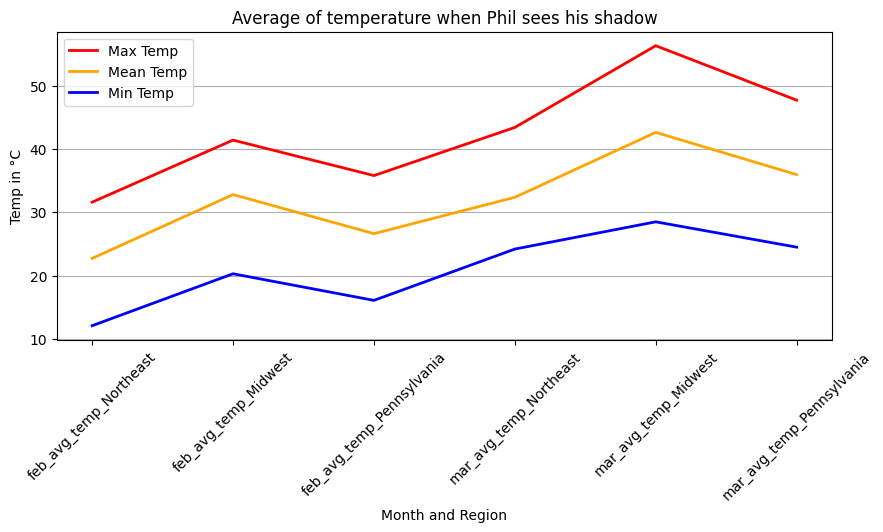

In [168]:
# Now we can have some fun of this! Let's plot the 'cold temperatures':

full_min = full_math.iloc[0, [1, 2, 3, 5, 6, 7]]
full_avg = full_math.iloc[1, [1, 2, 3, 5, 6, 7]]
full_max = full_math.iloc[2, [1, 2, 3, 5, 6, 7]]

# plt.plot(full_min, full_avg, full_max)
plt.figure(figsize=(10, 4))
plt.plot(full_max, linewidth=2, label='Max Temp', color='red')
plt.plot(full_avg, linewidth=2, label='Mean Temp', color='orange')
plt.plot(full_min, linewidth=2, label='Min Temp', color='blue')
plt.xticks(rotation=45)
plt.xlabel('Month and Region')
plt.ylabel('Temp in °C')
plt.title('Average of temperature when Phil sees his shadow')
plt.grid(axis='y')
plt.legend()
plt.show()

In [169]:
# Now let's analyze the occurrences in which Phil DOES NOT sees his shadow and why not? Will include 'Partial shadow' as well.

no_s = ghd[(ghd['Punxsutawney_Phil'] == 'No Shadow')|(ghd['Punxsutawney_Phil'] == 'Partial Shadow')]
no_s_num = no_s.select_dtypes(include='number')
no_math = no_s_num.agg(['min', 'mean', 'max'])
no_math

,feb_avg_temp,feb_avg_temp_Northeast,feb_avg_temp_Midwest,feb_avg_temp_Pennsylvania,mar_avg_temp,mar_avg_temp_Northeast,mar_avg_temp_Midwest,mar_avg_temp_Pennsylvania
min,30.740000,10.400,26.10000,15.2000,38.5000,27.3000,37.30000,30.8000
mean,35.275625,23.275,33.59375,27.0375,42.8625,33.1375,43.09375,36.4125
max,39.490000,28.600,39.90000,33.9000,47.6600,38.8000,50.10000,43.4000


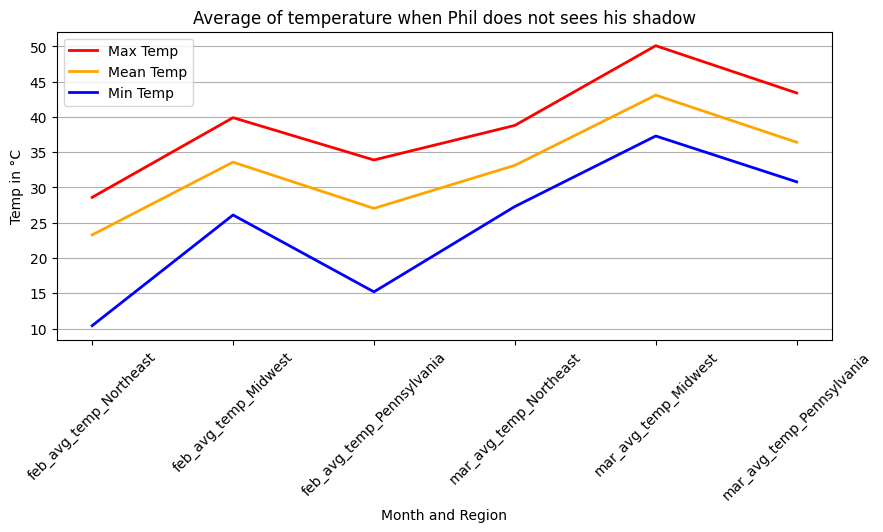

In [170]:
no_min = no_math.iloc[0, [1, 2, 3, 5, 6, 7]]
no_avg = no_math.iloc[1, [1, 2, 3, 5, 6, 7]]
no_max = no_math.iloc[2, [1, 2, 3, 5, 6, 7]]

# plt.plot(no_min, no_avg, no_max)
plt.figure(figsize=(10, 4))
plt.plot(no_max, linewidth=2, label='Max Temp', color='red')
plt.plot(no_avg, linewidth=2, label='Mean Temp', color='orange')
plt.plot(no_min, linewidth=2, label='Min Temp', color='blue')
plt.xticks(rotation=45)
plt.xlabel('Month and Region')
plt.ylabel('Temp in °C')
plt.title('Average of temperature when Phil does not sees his shadow')
plt.grid(axis='y')
plt.legend()
plt.show()

# Now, based on the previous analysis,
    - Do you think the legend is true?
    - What would you modify to imporove this analysis?
    - Is there any other way to analyze this dataset?
    - Have you learned anything with this notebook?

In [171]:
# End of analysis and code.